# EX2


# Background

 The Levenshtein distance is a metric that measures string similarity by counting the minimum number of single-character edits required to transform one string into another. These edits can include insertions, deletions, or substitutions of characters. For example, the Levenshtein distance between "kitten" and "sitting" is 3 because we need to substitute 'k' with 's', change 'e' to 'i', and insert 'g' at the end.
 
Here's how to use the Levenshtein Python library to calculate this distanc
* First, install the python library (if you haven't already): pip install python-Levenshtein* Then, use the following code to calculate the distance. 


In [1]:
import Levenshtein

# Strings to compare
str1 = "kitten"
str2 = "sitting"

# Calculate Levenshtein distance
distance = Levenshtein.distance(str1, str2)
print(f"The Levenshtein distance between '{str1}' and '{str2}' is {distance}.")

The Levenshtein distance between 'kitten' and 'sitting' is 3.


## What you have to do:

### 	Generate (see Lab 3)
1.	5 random DNA strings of length X, 
2.	5 random DNA strings of length 5*X, 
3.	5 random DNA strings of length 10*X, 
4.	5 random DNA strings of length 50*X, 
5.	5 random DNA strings of length 100*X, 
6.	5 random DNA strings of length 500*X, 
7.	5 random DNA strings of length 1000*X,
8.	...etc
      till N.
... and write them (see Lab 3) to file file1.txt. You should select N and X, depending on your laptop/RAM setup. If you use large X, say 1000000, you may experience serious delays with the execution of Levenshtein.distance(). We suggest trying with X=100 (or 1000), and N=7 to start with and adjust appropriately,

Reapeat previous step (use same X and N as before), and write the strings to file file1.txt. file2.txt. 

# Approach

There will be ***code comments*** detailing what the *code* is doing along with the *markdown*.

Small *functions* will be implemented for most of the operations in the exercise.

Interlocking segments of code and *markdown* will be present throughout the file with explanations of the code and definitions of the requirement it fulfills.

### Note that each python cell is not independent

One should run previous cells before any one individual cell to ensure correct behavior

### The following cells details the functions used in the requirements thus far:

In [1]:
# Importing libraries
from Levenshtein import distance as dist
import matplotlib.pyplot as plt
from os import remove
import random
from time import time, perf_counter

def timeit(func):
    """Wrapper function definition for printing how long a function took to run"""
    def wrapper(*args, **kwargs):
        start_time = time()  # Record the start time
        result = func(*args, **kwargs)  # Execute the function
        end_time = time()  # Record the end time
        elapsed_time = end_time - start_time  # Calculate the duration
        print(f"Function '{func.__name__}' executed in {elapsed_time:.4f} seconds")
        return result
    return wrapper

## The timeit function

The timeit *function* has no real impact on the rest of the script but I like using it to make sure that the implementations of the *functions* are sound and dont take too long to `execute`
It's meant to be a ***wrapper*** for the other *functions* of the script and it simply contains a `nested` *function* within it, that takes a time snapshot before and after the ran *function*, and `prints` the time elapse to the *terminal*

In [2]:
@timeit
def generator(lines, length, filename, mode):
    """Generates a file that has random contents with defined lines and line lengths"""
    chars = ['A','T','G','C'] # Define files content list
    query = open(filename, mode) # Open in order to write
    output = '' # Initializing variables
    for line in range(lines): # Height of file
        for char in range(length): # Width of file
            output += random.choice(chars) # Choose randomly form the options
        output += '\n' # formatting
    query.write(output) # Writing to file
    query.close() # Don't forget to close ;)

## The generator function

The `timeit wrapper` has been applied to the *function*

The *function* has four ***positional arguments***, with the explicit purpose of writing a random sting to a file
* lines -> The number of lines to be written
* length -> The length of each line in characters
* filename -> What file to write to
* mode -> How it should interact with the file to output the resutls

It begins with the initialization of a list that contains the characters to be used in the file.
It loads the file and initializes a precursor output *variable*
Then, it iterates the file lines and the how many characters we want, adding a random choice from the list of characters for every position


In [3]:
@timeit
def caller(times, x, filename, mode):
    """Calls the generator function with a algorythm for the requirements"""
    factors = [] # To keep the values for the plot in the later question
    for batch in range(times):
        if batch == 0: # Base case
            factor = 1
        elif batch % 2 == 0: # For every even loop number
            factor *= 2 # Modify the factor such that the line length is correct
        else: # For every odd loop
            factor *= 5 # Modify the factor such that the line length is correct
        characters = factor * x # Taking the function input and the factor multiplication and defining the line legth
        factors.append(characters)
        generator(lines = 5, length = characters, filename = filename, mode = mode) # Calling generator with all the new parameters
    return factors

## The caller function

The `timeit wrapper` has been applied to the *function*

The *function* has four ***positional arguments***, with the explicit purpose of `calling` the `generator` *function*
* times -> The number of batches to call the `generator` *function*
* x -> The starting amount of characters to use
* filename -> What file to write to
* mode -> How it should interact with the file to output the resutls

The `caller` has a simple function, to call the generator function with keys that relate to the algorithm needed. For this we simply check the modulo of the loop index we are at and change the factor acordingly to reach desired behavior. A list keeps the number of characters of each line after we calculate them based on the motif of the algorithm, that is eventually `returned` by the *function*


In [4]:
# Initializng files (also to empty them)
with open('file1.txt', 'w') as file:
    pass
with open('file2.txt', 'w') as file:
    pass
# Making the script a little more interactive
inp1 = int(input(f'How many characters should the first line have?'))
inp2 = int(input(f'How many batches do you want written?'))
# Calling and storin the caller, sizes for each file
sizes = caller(x = inp1, times = inp2, filename = "file1.txt", mode = 'a')
caller(x = inp1, times = inp2, filename = "file2.txt", mode = 'a')

How many characters should the first line have? 100
How many batches do you want written? 7


Function 'generator' executed in 0.0015 seconds
Function 'generator' executed in 0.0027 seconds
Function 'generator' executed in 0.0044 seconds
Function 'generator' executed in 0.0122 seconds
Function 'generator' executed in 0.0219 seconds
Function 'generator' executed in 0.1025 seconds
Function 'generator' executed in 0.2109 seconds
Function 'caller' executed in 0.3571 seconds
Function 'generator' executed in 0.0000 seconds
Function 'generator' executed in 0.0015 seconds
Function 'generator' executed in 0.0030 seconds
Function 'generator' executed in 0.0120 seconds
Function 'generator' executed in 0.0221 seconds
Function 'generator' executed in 0.1068 seconds
Function 'generator' executed in 0.2104 seconds
Function 'caller' executed in 0.3568 seconds


[100, 500, 1000, 5000, 10000, 50000, 100000]

# Implementation and output

Im the block above we simply:
* Initialize the files we will need (or empty them to format the data, it's the same function `open() pass`)
* Get command line input
* Call the `caller()` *function* with input


# Starting the second part of the requirements

In [5]:
# •	Measure the execution time of Levenshtein.distance() for string pairs: one string from file1.txt and one from file2.txt as follows: 1st line of file1.txt with 1st line of file2.txt, 2nd line of file1.txt with 2nd line of file2.txt, 3rd line of file1.txt with 3rd line of file2.txt etc...

@timeit
def measure():
    # Reading input
    query = open('file1.txt', 'r')
    requery = open('file2.txt', 'r')
    # Begining calculations
    element = requery.readlines()
    size = len(element)
    table = [0.0]*size # Initialize a data structure that fits the length of the files in lines
    pairs = [0.0]*size # Initialize a data structure that fits the length of the files in lines
    # Calculating distances
    for index, line in enumerate(query.readlines()):
        sequence = element[index]
        start = perf_counter()
        holder = dist(line.strip(), sequence.strip()) # Levenstein distance (look at imports)
        stop = perf_counter()
        pairs[index] = holder
        table[index] = stop - start
    return table, pairs

# Checking output
times, values = measure()
print(times)
print(len(times))
print(values)
print(len(values))

Function 'measure' executed in 3.1172 seconds
[0.0009375999798066914, 9.299954399466515e-06, 4.500034265220165e-06, 3.1999661587178707e-06, 3.400025889277458e-06, 2.929999027401209e-05, 2.519995905458927e-05, 2.4900014977902174e-05, 2.540001878514886e-05, 2.589996438473463e-05, 8.230004459619522e-05, 8.080003317445517e-05, 7.92999635450542e-05, 6.250001024454832e-05, 6.310001481324434e-05, 0.0013334000250324607, 0.0012730999733321369, 0.0012906999909318984, 0.0012741999817080796, 0.0012793000205419958, 0.00532190001104027, 0.005849600012879819, 0.005690499965567142, 0.005676799977663904, 0.004987300024367869, 0.12268739996943623, 0.12145440001040697, 0.12350159999914467, 0.12282600003527477, 0.12262169999303296, 0.4873429999570362, 0.4855845000129193, 0.48618760000681505, 0.4887626000563614, 0.49001140001928434]
35
[56, 58, 58, 54, 54, 262, 257, 276, 256, 272, 521, 531, 526, 512, 529, 2607, 2604, 2597, 2595, 2589, 5176, 5189, 5171, 5179, 5193, 25894, 25835, 25837, 25861, 25862, 51676, 

# The measure function

The `timeit wrapper` has been applied to the *function*

The *function* has no ***positional arguments***, with the explicit purpose of calculating the Levenstein distances of strings in matching lines of `file1.txt` and `file2.txt`

`measure` loads both files into memory, creates two tables with enough memory for all the pairs. It indexes over the lines of one file and indexes into the other file's line in thesame position using the index (to avoid re iterating elements). In each loop the Levenstein distance is calculated and surrounding the *function* that calculates the Levenstein distance is a time calculation, that gets added to the lists we initialized at the start of the `measure` *function*. The `return values` are a tuple with the list with all the times and a list with all the distances.

In [6]:
# •	Calculate average (AVG) execution time for strings of same length.

@timeit
def average(data):
    sum = 0
    for thing in data: # Loop over data
        sum += thing
    return sum / len(data) # Calculate the average

entries = len(times) # To define the number of iterations to do
averages = [0.0]*int(entries/5) # A data structure for the values
for i in range(0, entries, 5): # 5 step iteration
    slice = times[i:i + 5:] # Getting a subsection of the times list, a 5 value sclice for the average of the simillar sized sequences
    averages[int(i / 5)] = average(slice) # Calculating averages

Function 'average' executed in 0.0000 seconds
Function 'average' executed in 0.0000 seconds
Function 'average' executed in 0.0000 seconds
Function 'average' executed in 0.0000 seconds
Function 'average' executed in 0.0000 seconds
Function 'average' executed in 0.0000 seconds
Function 'average' executed in 0.0000 seconds


In [7]:
print(averages)

[0.00019159999210387467, 2.6139989495277403e-05, 7.360001327469945e-05, 0.0012901399983093142, 0.005505219998303801, 0.12261822000145912, 0.4875778200104833]


# The average function and the final data calculations

## The average function

The `timeit wrapper` has been applied to the *function*

The *function* has one ***positional argument***, with the explicit purpose of calculating the average of the list of data given.

`average` iterates over the elements of a list and hold the sum in a variable. Once done it will divide the sum with the length of the list

## The final calculations

We use batches of 5 to calculate the averages, because strings of similar size are in batches of 5 form the way `generator()` works in this exercise.
A range with step 5 goes over the values that `measure()` returns, and the average of the elements starting from the loop index to 4 elements farther down (5 in total) is calculated. The results are stored in a list

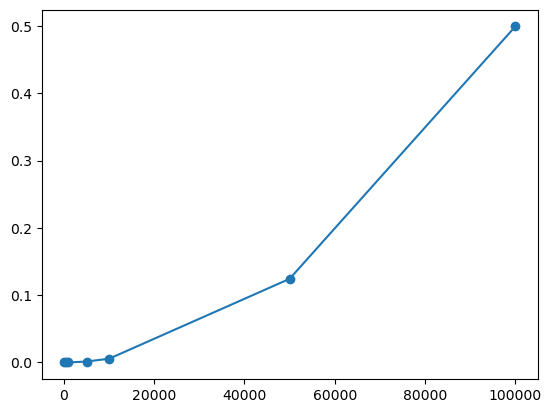

In [9]:
# •	Plot a graph (see Lab 3) to show the performance: AVG execution time (Y-axis) vs string length (X-axis). Check here for a nice plot tutorial: https://matplotlib.org/stable/tutorials/pyplot.html

plt.plot(sizes, averages, marker = 'o') # Plotting with points that stand out

plt.show()

# The Graph

The two lines of matplotlib produce the graph above.

The x axis is the size of the strings in the files `file1.txt`, `file2.txt`

The y axis is the average time a batch of 5 pairs took to compute the *Levenstein* distance

We see an exponential result, that stems from the data we have input. The way the line length grows in `file1.txt` and `file2.txt` leads to this result and it's not indicative of an exponential relationship between adding 1 character and the time complexity.

There is a very interesting results in the first set of 5, the time is greater than the next set of 5. It seems that the first time the `distance` *function* is called it's slower and this leves a mark on our results.

Thus the exercise has concluded.